#### Libraries

In [125]:
import sys
import sklearn
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt


#### Import data

In [126]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\205674\Desktop\STRUCT\Working directories\ds-hub-repo\dshub\homl-rmn


In [127]:
file_path = "datasets/housing/housing.csv"
df = pd.read_csv(file_path)

#### Preview data

In [128]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Description of data

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Categorical Field Counts

In [130]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### Numerical Data Summary

In [131]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Histogram: Numerical Attributes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

#### Create Train/Test Set (2 alternatives)

- I. Scikit learn random split

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("length of train_set is: ",  len(train_set))
print("length of test_set is: ",  len(test_set))

#### Create a median income category field to strategically split data

###### Assuming we find out that median income is supposed to be an imp attribute, we ensure that the test set is representative of the various categories of incomes in the whole dataset 

<Axes: >

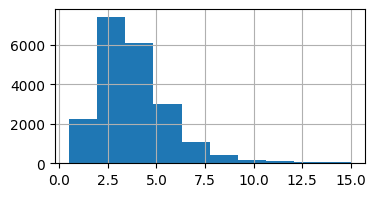

In [132]:
df['median_income'].hist(figsize=(4,2))

###### create a category for target variable to do stratified split

In [133]:
df["income_category"] = pd.cut(df['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])

In [134]:
df['income_category'].value_counts()

income_category
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [ ]:
df['income_category'].hist(figsize=(4,2))

- II. Stratified Sampling [sklearn]

###### - Right number of instances are sampled from each stratum to represent overall population

In [135]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [136]:
strat_test_set["income_category"].value_counts()/len(strat_test_set)

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [138]:
print(strat_train_set.shape, strat_test_set.shape)

(16512, 11) (4128, 11)


#### Compare splits [use to validate equal sampling of classes in test set and original data ]

In [ ]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

##### Drop the category column now that test split is complete 

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

#### Start using train data

In [199]:
df_train = strat_train_set.copy()
df_test = strat_test_set.copy()

#### Data Visualization

###### we use training set from now

In [ ]:
df_train.plot(kind = "scatter", x="longitude", y="latitude", alpha = 0.1) #alpha sets opacity so overlapping points are visible 

###### Plot below indicates that housing prices along the coast and densely populated (larger circles) areas are higher (red)

In [ ]:
df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df_train["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()

#### Correlation Study

In [181]:
non_numeric_field = ['ocean_proximity']
df_numeric = df_train.drop(columns = non_numeric_field)
corr_matrix = df_numeric.corr()

###### Median income has a strong correlation with Median House Value [As income increases, house value increases]
###### Latitiude and Median house value has a small negative correlation [As we go north, prices tend to come down]

In [182]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
income_category       0.642887
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] #check only promising fields or plot will have too many
scatter_matrix(df_train[attributes], figsize=(12,8))
plt.show()

###### Since income is the most promising, lets look deeper

In [ ]:
df_train.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)
#plt.axis([0, 16, 0, 550000])
plt.show()

#### Engineer new feature(s)

In [144]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category',
       'rooms_per_household'],
      dtype='object')

In [200]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df["households"]

In [145]:
non_numeric_field = ['ocean_proximity']
df_numeric = df_train.drop(columns = non_numeric_field)
corr_matrix = df_numeric.corr()

In [146]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688380
income_category        0.642887
rooms_per_household    0.143663
total_rooms            0.137455
housing_median_age     0.102175
households             0.071426
total_bedrooms         0.054635
population            -0.020153
longitude             -0.050859
latitude              -0.139584
Name: median_house_value, dtype: float64

#### Prepare Data for ML

In [201]:
print(df_train.shape, df_labels.shape)

(16512, 12) (16512,)


In [202]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category',
       'rooms_per_household'],
      dtype='object')

In [209]:
# Separate features and target variable
df_train_features = df_train.drop("median_house_value", axis=1)
df_train_labels = df_train["median_house_value"].copy()

#### Transformation Pipeline

In [194]:
#df_train = df_train.drop(columns = "median_house_value")

In [203]:
print(df_train.shape, df_labels.shape)

(16512, 12) (16512,)


In [210]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for numerical attributes
num_attributes = list(df_train_features.select_dtypes(include=[np.number]))
cat_attributes = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [211]:
# Create a full pipeline for numerical and categorical attributes
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

In [212]:
df_prepared = full_pipeline.fit_transform(df_train_features)

In [213]:
df_prepared.shape

(16512, 14)

In [216]:
print(df_train.shape, df_prepared.shape,df_labels.shape)

(16512, 12) (16512, 14) (16512,)


#### Training 

#### Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_train_labels)

LinearRegression()

In [218]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_train_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68129.55795124636

In [220]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_train_labels, df_predictions)
lin_mae

49623.50962552856

##### Decision Tree Regressor

In [231]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_train_labels)

DecisionTreeRegressor(random_state=42)

In [232]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross Validation [Split Train set to 10-fold]

In [233]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [234]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [65808.73590454 69355.87852781 67755.89718207 71151.01071684
 68885.2301684  67988.63438019 67839.78962862 71749.81950382
 73430.39363606 69360.75168844]
Mean: 69332.61413367956
Standard deviation: 2123.235522773246


In [235]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [69812.19116329 67164.86355623 67223.95435675 68914.35943225
 67248.95526173 68521.47431978 67491.24793494 70191.98443522
 67593.67057358 68268.22677028]
Mean: 68243.09278040678
Standard deviation: 1047.1640750630695


In [236]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor(random_state=42)

###### Training Set Scores

In [237]:
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18156.55209098723

###### Cross Validation Scores

In [238]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48689.23974498 49976.14102006 47347.41415499 49720.01305622
 48811.83739122 49268.99968971 49377.580453   49460.22378601
 48992.02700622 49187.91512082]
Mean: 49083.139142323984
Standard deviation: 687.5518472732065


#### SVM

###### Training Set Score

In [239]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
housing_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

18156.55209098723

##### Joblib to dump pkl

In [241]:
import joblib 

joblib.dump(forest_reg, "regression-housing.pkl")
# load_model = joblib.load("regression-housing.pkl")

['regression-housing.pkl']

#### Grid Search